In [ ]:
from pyspark import SparkContext
sc = SparkContext(appName = "k-means", master='local[*]')

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
mean_number = 4
err_distance = np.inf

In [259]:
def cast_list(x):
    return np.array(x,dtype=float)
    
import pyspark

pointstxt = sc.textFile("/home/bruk/projects/cloud/k-means/generate_point/points.txt")
points = pointstxt.map(lambda x: x.split(",")).map(lambda x: cast_list(x))
starting_means = points.takeSample(num = mean_number, withReplacement=False)

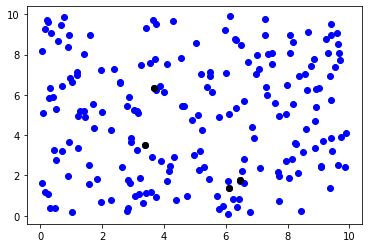

In [260]:
from pyspark.rdd import RDD
def plot(entries,color='blue'):
    x:float = []
    y:float = []
    if isinstance(entries, RDD):
        points = entries.collect()
    elif type(entries) is list:
        points = entries
    for point in points:
        x.append(point[0])
        y.append(point[1])

    plt.scatter(x,y,c=color)
    
plot(points)
plot(starting_means, color='black')
plt.show()

In [271]:
def closest_mean(point, means):
    j = 0
    for mean in means:
        if j == 0:
            shortest_distance = np.linalg.norm(np.subtract(mean,point))
            nearest_index = j
            j = j + 1
        else:
            distance = np.linalg.norm(np.subtract(mean,point))
            if(shortest_distance > distance):
                nearest_index = j
            j = j + 1           
    return nearest_index

 means num  4  error  972.7214509422292
 means num  3  error  991.2508076013935
 means num  3  error  992.4671910956445
[5.12802089 8.23511668]
[6.68824208 2.72288624]
[9.0849541  7.45496704]


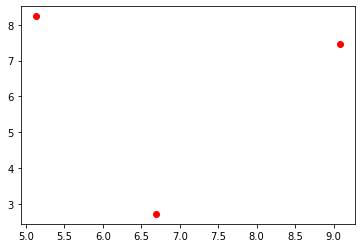

In [276]:
def shortest_distance(point, means):
    j = 0
    for mean in means:
        if j == 0:
            shortest_distance = np.linalg.norm(np.subtract(mean,point))
            j = j + 1
        else:
            distance = np.linalg.norm(np.subtract(mean,point))
            if(shortest_distance > distance):
                short_distance = distance
            j = j + 1        
    return shortest_distance

i = 0
interm_means = sc.broadcast(starting_means)
while True:
    prev_errDist = err_distance
    new_means = points.keyBy(lambda x: closest_mean(x, interm_means.value)) \
                                 .reduceByKey(lambda x, y: np.average(np.array([x, y]), axis=0)).values().collect()

    temp = points.map(lambda x:shortest_distance(x, interm_means.value))
    err_distance = temp.reduce(lambda x,y:x+y)
    
    i += 1
    if i > 0:
        interm_means = sc.broadcast(new_means)
    print(" means num ", len(interm_means.value), " error ", err_distance) 
    if(i > 1 and math.fabs(prev_errDist - err_distance) < 0.01*prev_errDist):
        plot(new_means,color = 'red')
        for i in new_means:
            print(i)
        break
        
        
plt.show()

###  small testing codes for minimal experiments

In [ ]:
new_means = points.map(lambda x:(closest_mean(x, interm_means.value), x))\
        .reduceByKey(lambda x,y: np.average(np.array([x,y]),axis=0)) \
        .values().collect()
print(new_means)
#temp = new_means.reduceByKey(lambda x, y: (x + y)/2)
#print(temp.collect())
#print(new_means.take(10))

In [226]:
import numpy as np
x = np.array([0,0],dtype=float)
y = np.array([3,4],dtype=float)
z = np.array([-3,-4],dtype=float)
dist = np.linalg.norm(np.subtract(z,y))
mean = np.average(np.array([x, y, z]),axis=0)
print(y)
print(mean)
print(dist)

[3. 4.]
[0. 0.]
10.0
